In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [52]:
x1 = np.random.normal(0,1,(20,50))
x2 = np.random.normal(2,2,(20,50))
x3 = np.random.normal(1,2,(20,50))
data = pd.DataFrame(np.concatenate([x1,x2,x3], axis=0), columns=np.arange(1,51))
X = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index=data.index)
X.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,-1.407334,-1.184852,-1.363363,-0.527379,-0.066382,-0.992843,-0.108907,-0.787492,-0.144572,-0.251507,...,-0.596650,-0.493627,0.108687,-0.816403,-0.199192,-0.052730,-0.187054,-0.068572,-0.314030,0.068357
1,-1.009524,-0.762036,-0.757282,-0.157664,0.016300,-0.549407,-0.918114,-1.532575,-0.899542,-0.100799,...,-0.823579,-0.073596,-0.837313,0.168513,-0.014719,0.427918,0.418015,-0.700220,-0.651131,-0.379847
2,-0.199584,-1.194721,-1.012515,-0.416268,-1.296405,-0.316101,-1.106774,-0.567108,-1.703261,-0.746080,...,-1.219149,-1.550904,-0.310566,-1.019419,-0.182547,-0.192920,-0.542461,-0.494120,-0.264584,-0.582813
3,-0.674699,0.135468,0.476615,-0.238622,-0.642286,-1.525542,-0.032409,-0.704823,-0.173474,-1.378793,...,-0.153691,0.370544,-0.235916,-0.362216,-0.494601,-0.604496,-0.995138,-0.911545,0.252152,-0.930832
4,-0.537021,-0.966381,-0.685142,-0.493873,-0.431188,-0.912657,-0.952269,-0.358656,-0.111382,-0.381585,...,-1.053225,-1.925407,-0.480512,-0.463524,-0.998830,-0.091880,-0.827618,-0.673596,0.157483,0.001779


In [53]:
y = np.concatenate([np.zeros(20), np.ones(20), np.ones(20)*2], axis=0).astype('int')
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

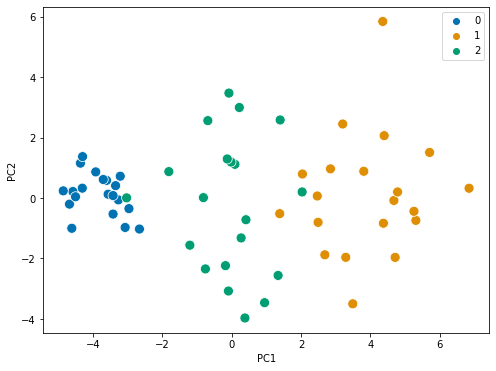

In [60]:
pca = PCA()
pc_names = ['PC{}'.format(x) for x in range(1, len(X.columns)+1)]
pc = pca.fit_transform(X)
pc = pd.DataFrame(pc, columns=pc_names, index=X.index)
loadings = pca.components_.T
loadings = pd.DataFrame(loadings, columns=pc_names, index=X.columns)
plt.figure(figsize=(8,6))
sb.scatterplot(data=pc, x='PC1', y='PC2', hue=y, s=100, palette='colorblind');

Total sum of squares within-cluster: 2331.85


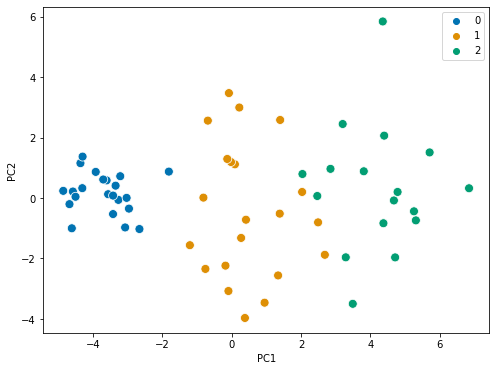

In [56]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
print('Total sum of squares within-cluster: {:.2f}'.format(kmeans.inertia_))

plt.figure(figsize=(8,6))
sb.scatterplot(data=pc, x='PC1', y='PC2', hue=kmeans.labels_, s=80, palette='colorblind')
plt.show()

Total sum of squares within-cluster: 2498.10


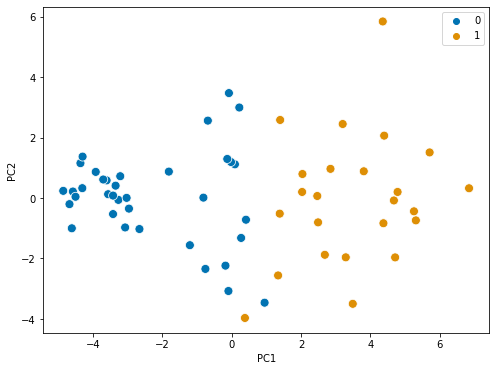

In [57]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)
print('Total sum of squares within-cluster: {:.2f}'.format(kmeans.inertia_))

plt.figure(figsize=(8,6))
sb.scatterplot(data=pc, x='PC1', y='PC2', hue=kmeans.labels_, s=80, palette='colorblind')
plt.show()

Total sum of squares within-cluster: 2247.70


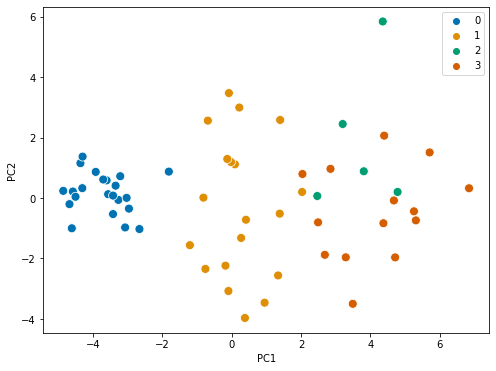

In [58]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(X)
print('Total sum of squares within-cluster: {:.2f}'.format(kmeans.inertia_))

plt.figure(figsize=(8,6))
sb.scatterplot(data=pc, x='PC1', y='PC2', hue=kmeans.labels_, s=80, palette='colorblind')
plt.show()